# Import Libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Load Data

In [0]:
df = pd.read_csv("lab1.csv")

# Explore column data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TargetB           9686 non-null   int64  
 1   ID                9686 non-null   int64  
 2   TargetD           4843 non-null   float64
 3   GiftCnt36         9686 non-null   int64  
 4   GiftCntAll        9686 non-null   int64  
 5   GiftCntCard36     9686 non-null   int64  
 6   GiftCntCardAll    9686 non-null   int64  
 7   GiftAvgLast       9686 non-null   float64
 8   GiftAvg36         9686 non-null   float64
 9   GiftAvgAll        9686 non-null   float64
 10  GiftAvgCard36     7906 non-null   float64
 11  GiftTimeLast      9686 non-null   int64  
 12  GiftTimeFirst     9686 non-null   int64  
 13  PromCnt12         9686 non-null   int64  
 14  PromCnt36         9686 non-null   int64  
 15  PromCntAll        9686 non-null   int64  
 16  PromCntCard12     9686 non-null   int64  


The dataframe .info() output revealed a number of important information from the dataset:

* Number of rows (or entries): **9686**
* Number of fields (or columns): **28**

* Number of entries and data type for each column: 

> * **9686** entries and integer number for Target B
> * 7906 entries and floating point for GiftAvgCard36



In [4]:
pd.Series.describe(df.DemAge)

count    7279.000000
mean       59.150845
std        16.516400
min         0.000000
25%        47.000000
50%        60.000000
75%        73.000000
max        87.000000
Name: DemAge, dtype: float64

In [5]:
pd.Series.unique(df.DemAge)

array([nan, 67., 53., 47., 58., 39., 50., 45., 80., 61., 76., 41., 75.,
       59., 51., 31., 54., 70., 42., 65., 81., 38., 56., 69., 52., 33.,
       73., 71., 29., 60., 83., 43., 35., 77., 44., 72., 64., 34., 55.,
       37., 57., 46., 49., 32., 66., 87., 40., 79., 25., 63., 62., 48.,
       68., 86., 23., 27., 74., 78., 85., 26.,  7., 36., 82., 24., 17.,
       30., 84., 21., 28., 22., 19., 16., 14.,  6.,  0.,  2., 20., 18.,
       15.,  4.])

In [6]:
pd.Series.value_counts(df.DemAge)

73.0    216
67.0    215
75.0    203
49.0    201
57.0    187
       ... 
2.0       1
20.0      1
4.0       1
18.0      1
15.0      1
Name: DemAge, Length: 79, dtype: int64

In [7]:
pd.Series.value_counts(df.DemAge, bins=10)

(69.6, 78.3]     1437
(60.9, 69.6]     1250
(43.5, 52.2]     1223
(52.2, 60.9]     1043
(78.3, 87.0]      932
(34.8, 43.5]      889
(26.1, 34.8]      342
(17.4, 26.1]       72
(8.7, 17.4]        53
(-0.088, 8.7]      38
Name: DemAge, dtype: int64

The output of these functions revealed a number of data problems with "DemAge" column.

* There are only **7279** records in "DemAge" column (from .describe()'s count output), while the total number of records in this data set 
is **9686**.  This indicates missing values in "DemAge". This observation is also visible through the NaN printed by .unique() method.

* One record in "DemAge" has 0 as value (from the .value_counts() output). Logically, someone should not have age of 0. 

 


# Grouping distributions of columns

Let's start with age (DemAge). Run the following command to get the average age of lapsing donors vs non-lapsing donors.

In [8]:
df.groupby('TargetB')['DemAge'].mean()

TargetB
0    58.304444
1    59.979070
Name: DemAge, dtype: float64

The average age of lapsing donors is slightly higher than the non-lapsing donors.

Other than .mean(), we could also perform grouping with other method such as .value_counts() or .median(). Use value_counts() to get gender of lapsing and non-lapsing donors.

In [9]:
#Raw count of genders of lapsing and non-lapsing donors
df.groupby('TargetB')['DemGender'].value_counts()


TargetB  DemGender
0        F            2614
         M            1963
         U             266
1        F            2609
         M            1962
         U             272
Name: DemGender, dtype: int64

In [10]:
#Normalised count (percentage) of genders of lapsing and non-lapsing donors
df.groupby('TargetB')['DemGender'].value_counts(normalize=True)

TargetB  DemGender
0        F            0.539748
         M            0.405327
         U            0.054925
1        F            0.538716
         M            0.405121
         U            0.056164
Name: DemGender, dtype: float64

# Plotting distributions of columns

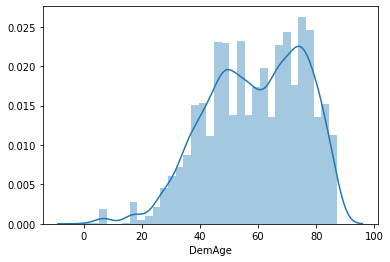

In [11]:
# 'DemAge' has missing values so use dropna
sns.distplot(df['DemAge'].dropna())


* From the plot above, we can see most donors are between 40-80 years old, with the data distribution skewed to right.


* For nominal/categorical variables, such as DemGender, countplot is used to build a bar chart to show distribution of each values.

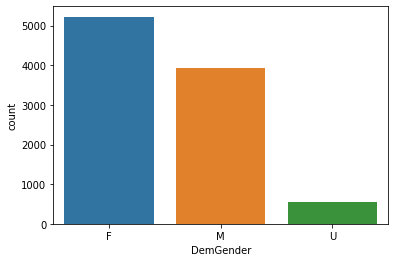

In [12]:
sns.countplot(data=df, x='DemGender')

Lastly, we can explore the distribution of a variable using boxplot. Assume we would like to see the difference of home values of the donors vs non-donors.

* We can build a boxplot with TargetB as X and DemMedHomeValue as y.

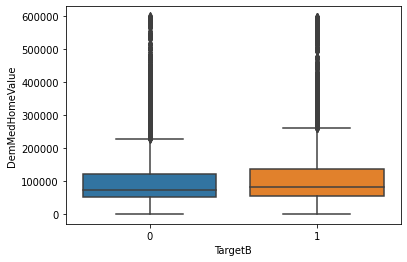

In [13]:
sns.boxplot(x="TargetB", y="DemMedHomeValue", data=df)

# Modifying and Correcting Data

 a) Incorrect type used for DemCluster and DemHomeOwner. DemCluster should be an categorical/nominal variable and DemHomeOwner should be a binary variable.


In [0]:
# change DemCluster from int to str
df['DemCluster'] = df['DemCluster'].astype(str)

In [15]:
df.DemHomeOwner.describe()

count     9686
unique       2
top          H
freq      5377
Name: DemHomeOwner, dtype: object

In [0]:
# change DemHomeOwner from Object to Binary
dem_home_owner = {'U':0, 'H': 1}
df['DemHomeOwner'] = df['DemHomeOwner'].map(dem_home_owner)

 b) Errorneous/invalid values (0) in DemMedIncome and DemAge.

In [17]:
df.DemMedIncome.value_counts(bins=10)

(40000.2, 60000.3]      3490
(-200.002, 20000.1]     2367
(20000.1, 40000.2]      1701
(60000.3, 80000.4]      1471
(80000.4, 100000.5]      420
(100000.5, 120000.6]     149
(120000.6, 140000.7]      52
(140000.7, 160000.8]      20
(160000.8, 180000.9]      14
(180000.9, 200001.0]       2
Name: DemMedIncome, dtype: int64

In [0]:
negative_val = df['DemMedIncome'] < 0
df.loc[negative_val, 'DemMedIncome'] = np.nan

 c) Missing values in DemAge, DemMedIncome, GiftAvgCard36.

In [0]:
df['DemAge'].fillna(df['DemAge'].mean(), inplace=True)

df['DemMedIncome'].fillna(df['DemMedIncome'].mean(), inplace=True)

df['GiftAvgCard36'].fillna(df['GiftAvgCard36'].mean(), inplace=True)

 d) Redundant variables in ID and TargetD.

In [0]:
df.drop(['ID', 'TargetD'], axis=1, inplace=True)

# END of Question